# House Price Recommander

The features of houses that I web scraped included the listing name, the address code, the number of bedrooms and bathrooms, year built, tenure, property type, mrt distance, square feet and price.

## Libraries importation

In [81]:
import re
import pandas as pd
import missingno as msno
import math
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Compiling scraped data

In [2]:
# data_list = []
# c=1
# for i in range(17):
#     data_list.append(pd.read_csv('scraped_pg{}_pg{}.csv'.format(c,c+9)))
#     c+=10
# data = pd.concat(data_list)
# data.head()

In [3]:
# data1 = pd.read_csv('scraped_pg171_pg200.csv')
# data2 = pd.read_csv('scraped_pg201_pg228.csv')
# data_final = pd.concat([data,data1,data2])
# data_final

In [4]:
# data_final.info()

In [5]:
# data_final.to_csv('compiled_data.csv')

In [6]:
data_final = pd.read_csv('compiled_data.csv')
data_final.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data_final

,title,address_code,beds,baths,year_built,tenure,property_type,mrt_distance,sqft,price
0,HDB Flat for Sale in 110A Depot Road,['(D4)'],3,3.0,NaN,99,HDB,NaN,990,"730,000"
1,HDB Flat for Sale in 208B Clementi Avenue 6,['(D5)'],2,2.0,NaN,NaN,HDB 3 Rooms,['(906 m)'],731,"610,000"
2,HDB Flat for Sale in 560 Hougang Street 51,['(D19)'],4,2.0,1999,99,HDB,['(438 m)'],"1,539","768,000"
3,HDB Flat for Sale in 322C Anchorvale Drive,['(D19)'],3,2.0,2002,99,HDB,['(369 m)'],"1,184","558,888"
4,HDB Flat for Sale in 225 Ang Mo Kio Avenue 1,['(D20)'],2,2.0,1978,NaN,HDB 3 Rooms,NaN,882,"375,000"
...,...,...,...,...,...,...,...,...,...,...
7975,2 Bed Condo for Sale in Whitehaven,['(D5)'],2,2.0,2017,Freehold,Apartment,['(2460 m)'],538,"960,000"
7976,3 Bed House for Sale in Sennett Estate,['(D13)'],3,2.0,NaN,Freehold,Corner Terrace,['(548 m)'],"3,179","4,500,000"
7977,3 Bed EC for Sale in Citylife @ Tampines,['(D18)'],3,3.0,2016,99,Executive Condo,['(1128 m)'],"1,216","1,350,000"
7978,5 Bed Condo for Sale in Hillion Residences,['(D23)'],5,3.0,2018,99,Condo,['(58 m)'],"2,616","3,029,000"


In [8]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          7980 non-null   object 
 1   address_code   7980 non-null   object 
 2   beds           7974 non-null   object 
 3   baths          7414 non-null   float64
 4   year_built     7385 non-null   object 
 5   tenure         7475 non-null   object 
 6   property_type  7751 non-null   object 
 7   mrt_distance   6027 non-null   object 
 8   sqft           7980 non-null   object 
 9   price          7980 non-null   object 
dtypes: float64(1), object(9)
memory usage: 623.6+ KB


In [9]:
data_final.head()

,title,address_code,beds,baths,year_built,tenure,property_type,mrt_distance,sqft,price
0,HDB Flat for Sale in 110A Depot Road,['(D4)'],3,3.0,NaN,99,HDB,NaN,990,"730,000"
1,HDB Flat for Sale in 208B Clementi Avenue 6,['(D5)'],2,2.0,NaN,NaN,HDB 3 Rooms,['(906 m)'],731,"610,000"
2,HDB Flat for Sale in 560 Hougang Street 51,['(D19)'],4,2.0,1999,99,HDB,['(438 m)'],"1,539","768,000"
3,HDB Flat for Sale in 322C Anchorvale Drive,['(D19)'],3,2.0,2002,99,HDB,['(369 m)'],"1,184","558,888"
4,HDB Flat for Sale in 225 Ang Mo Kio Avenue 1,['(D20)'],2,2.0,1978,NaN,HDB 3 Rooms,NaN,882,"375,000"


### Visualize missing data

<AxesSubplot: >

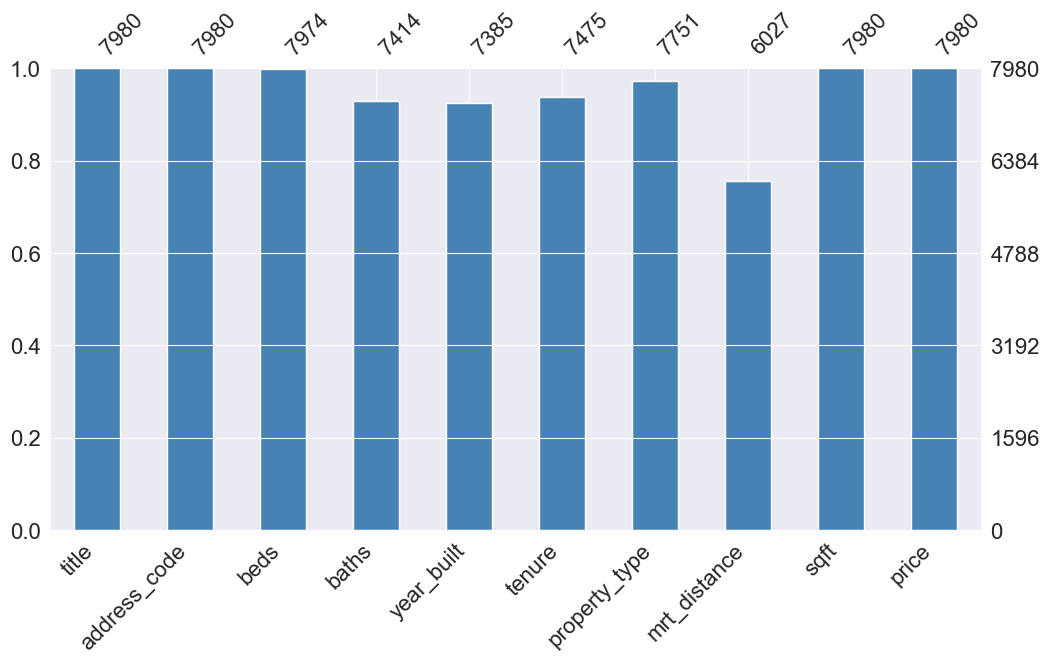

In [10]:
msno.bar(data_final, figsize=(12,6),color='steelblue')

There is a few missing data and we will attempt to clean the columns and peform some feature engineering.

#### First we drop any duplicate data

In [11]:
data_final=data_final.drop_duplicates()

In [12]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 0 to 7979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          5271 non-null   object 
 1   address_code   5271 non-null   object 
 2   beds           5265 non-null   object 
 3   baths          4871 non-null   float64
 4   year_built     4856 non-null   object 
 5   tenure         4898 non-null   object 
 6   property_type  5115 non-null   object 
 7   mrt_distance   3984 non-null   object 
 8   sqft           5271 non-null   object 
 9   price          5271 non-null   object 
dtypes: float64(1), object(9)
memory usage: 453.0+ KB


## Plan of Action

After careful review of the data, I have decided to drop the mrt distance column as there are too many NA values. I will also drop the year_built and tenure column as there are many NA values. I will clean the other columns to make it ready to be the input for the model.

##### Cleaning address code column

In [13]:
# Check the different value of address_code and check the occurrence of each one
data_final['address_code'].value_counts()


['(D19)']    680
['(D10)']    438
['(D15)']    373
['(D9)']     345
['(D18)']    331
['(D5)']     327
['(D3)']     313
['(D14)']    236
['(D23)']    216
['(D4)']     197
['(D16)']    168
['(D11)']    158
['(D12)']    144
['(D27)']    139
['(D1)']     137
['(D2)']     135
['(D28)']    132
['(D21)']    132
['(D13)']    122
['(D20)']    121
['(D22)']     93
['(D7)']      90
['(D17)']     83
['(D8)']      78
['(D25)']     60
['(D26)']     21
['(D6)']       2
Name: address_code, dtype: int64

Enhance the data quality by extracting the D and numbers

In [14]:
data_final['address_code']=data_final['address_code'].apply(lambda x: re.findall('D\d+',x)[0])

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\330663064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['address_code']=data_final['address_code'].apply(lambda x: re.findall('D\d+',x)[0])


In [15]:
L = data_final['address_code'].values
for i in range (len(L)):
    print(L[i][1:])
    L[i] = L[i][1:]
data_final['address_code'] = L

4
5
19
19
20
11
1
16
19
1
2
14
1
1
14
28
18
9
19
26
9
18
3
1
23
10
3
15
23
25
18
19
7
21
16
19
9
23
23
14
14
19
19
18
19
10
15
28
18
18
19
12
22
9
9
10
11
2
19
15
14
1
16
19
27
25
18
20
27
18
18
4
18
9
19
10
19
19
23
5
16
9
17
20
19
22
27
19
3
19
19
15
21
2
19
9
25
1
28
18
18
14
14
9
5
5
15
15
1
22
27
11
28
9
9
25
3
14
27
19
16
19
5
10
18
27
23
4
19
15
2
19
15
19
12
19
16
9
19
7
28
8
9
10
19
26
15
1
27
25
3
18
28
11
28
3
8
15
19
4
9
23
12
18
14
3
15
19
7
10
19
10
3
14
28
19
19
19
2
23
20
10
19
10
19
14
10
14
23
13
15
19
10
4
18
19
23
9
8
11
19
20
16
5
4
19
12
27
10
3
3
18
2
5
16
27
19
9
3
18
15
8
22
15
19
8
9
20
27
17
5
17
10
23
15
18
9
19
17
15
28
28
4
27
11
10
23
10
3
18
19
1
27
18
14
11
7
21
15
9
16
19
10
2
15
22
3
19
5
10
10
14
4
19
15
18
9
18
10
28
8
11
21
9
16
10
3
3
8
5
15
14
3
10
10
5
19
5
23
22
1
26
4
26
20
1
28
4
5
4
10
18
19
18
21
20
8
22
17
15
23
4
25
19
15
10
4
14
27
20
19
18
14
19
19
20
19
27
19
14
19
19
19
27
18
19
28
13
19
27
13
27
19
28
17
19
22
5
15
19
23
18
15
16
27


C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\4175980158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['address_code'] = L


In [16]:
data_final['address_code'].value_counts()

19    680
10    438
15    373
9     345
18    331
5     327
3     313
14    236
23    216
4     197
16    168
11    158
12    144
27    139
1     137
2     135
28    132
21    132
13    122
20    121
22     93
7      90
17     83
8      78
25     60
26     21
6       2
Name: address_code, dtype: int64

##### Cleaning the beds columns
###### The defining difference between a studio and 1-bedroom apartment is that a 1-bedroom features a separate bedroom area that is distinct and closed off from the living room and kitchen area. The column beds represents the bedrooms on the website, since studio isn’t a separate bedroom, I will change all labelled ‘studio’ to 0.

In [17]:
data_final['beds'].value_counts()

3         1820
2         1400
1          771
4          756
5          320
6           88
Studio      66
7           23
9            9
8            7
10           5
Name: beds, dtype: int64

In [18]:
# replace "studio" value to "0" must be all numerical data
# L = data_final['beds'].values
# for i in range (len(L)):
#     if L[i] == 'Studio':
#         data_final['beds'][i]= data_final['beds'][i].replace('Studio', '0')
# or
data_final['beds']=data_final['beds'].apply(lambda x:0 if x=='Studio' else x)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\1152973224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['beds']=data_final['beds'].apply(lambda x:0 if x=='Studio' else x)


In [19]:
data_final['beds'].value_counts()
# data_final['beds'].info

3     1820
2     1400
1      771
4      756
5      320
6       88
0       66
7       23
9        9
8        7
10       5
Name: beds, dtype: int64

Dropping the rows with NA values in beds
or
Replacing beds empty values with their mean values to make the data distribution symmetric.

In [20]:
data_final.dropna(subset=['beds'],inplace=True)
# sumi =0
# for i in range(len(data_final['beds'].values)):
#     if data_final['beds'].values[i] is not None:
#         sumi = sumi + int(data_final['beds'].values[i])
#
# print(sumi)
# data_final['beds']
# data_final['beds'].astype(float)
# mean_value = data_final['beds'].mean()
# data_final['beds'] = pd.to_numeric(data_final['beds'], errors='coerce').fillna(mean_value)
# data_final['beds'] = data_final['beds'].fillna(data_final['beds'].mean())

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\488623557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(subset=['beds'],inplace=True)


##### Cleaning the baths column

In [21]:
data_final['baths'].value_counts()

2.0     2248
1.0     1041
3.0      806
4.0      362
5.0      227
6.0      106
7.0       50
8.0       17
9.0        7
10.0       1
Name: baths, dtype: int64

Converting bathrooms to float 

In [22]:
data_final['baths']=data_final['baths'].apply(lambda x:0 if math.isnan(x) else float(x))
data_final['baths'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\4266386222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['baths']=data_final['baths'].apply(lambda x:0 if math.isnan(x) else float(x))


2.0     2248
1.0     1041
3.0      806
0.0      400
4.0      362
5.0      227
6.0      106
7.0       50
8.0       17
9.0        7
10.0       1
Name: baths, dtype: int64

###### Dropping tenure, year and mrt column

In [23]:
print("- Tenure missing values :{} \n- year_build missing values :{} \n- mrt_distance missing values :{}".format(data_final['tenure'].isnull().sum(), data_final['year_built'].isnull().sum(), data_final['mrt_distance'].isnull().sum()))

- Tenure missing values :373 
- year_build missing values :415 
- mrt_distance missing values :1287


We think that despite year_build have a lot of missing values ... it will be kept and delete rows with NaN value

In [24]:
data_final.drop(['tenure','mrt_distance'],axis=1,inplace=True)
# data_final.drop(['year_built'],axis=1,inplace=True)
data_final.dropna(subset=['year_built'],inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\489396703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(['tenure','mrt_distance'],axis=1,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\489396703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(subset=['year_built'],inplace=True)


In [25]:
data_final.head()

,title,address_code,beds,baths,year_built,property_type,sqft,price
2,HDB Flat for Sale in 560 Hougang Street 51,19,4,2.0,1999,HDB,"1,539","768,000"
3,HDB Flat for Sale in 322C Anchorvale Drive,19,3,2.0,2002,HDB,"1,184","558,888"
4,HDB Flat for Sale in 225 Ang Mo Kio Avenue 1,20,2,2.0,1978,HDB 3 Rooms,882,"375,000"
5,3 Bed Condo for Sale in Apleton View,11,3,3.0,2005,Condo,"1,853","3,300,000"
6,4 Bed Condo for Sale in Marina One Residences,1,4,5.0,2018,Condo,"2,250","7,500,000"


##### Cleaning the sqft column

In [26]:
data_final['sqft'].value_counts()

1,001    84
990      76
1,184    75
904      64
463      63
         ..
1,139     1
2,926     1
2,401     1
1,691     1
965       1
Name: sqft, Length: 692, dtype: int64

Removing ',' in numbers and the rows with 0 be confirmed.

In [27]:
data_final['sqft']=data_final['sqft'].apply(lambda x: float(x.replace(',','')))
data_final['sqft'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\3898966392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['sqft']=data_final['sqft'].apply(lambda x: float(x.replace(',','')))


1001.0    84
990.0     76
1184.0    75
904.0     64
463.0     63
          ..
1139.0     1
2926.0     1
2401.0     1
1691.0     1
965.0      1
Name: sqft, Length: 692, dtype: int64

##### Cleaning the price column

In [28]:
data_final['price'].value_counts()

1,100,000    56
1,250,000    53
1,200,000    50
1,500,000    45
1,050,000    43
             ..
2,121,798     1
4,283,000     1
2,412,000     1
3,597,200     1
2,613,000     1
Name: price, Length: 1828, dtype: int64

In [29]:
def price_cleaner(x):
    if x == 'o be confirmed':
        return None
    else:
        return float(x.replace(',',''))
    
data_final['price']=data_final['price'].apply(price_cleaner)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\3654414605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['price']=data_final['price'].apply(price_cleaner)


In [30]:
data_final.dropna(subset=['price'],inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\475558507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(subset=['price'],inplace=True)


##### Cleaning the property type column

In [31]:
data_final['property_type'].value_counts()

Condo              3412
HDB                 628
Apartment           315
Executive Condo     136
HDB 5 Rooms          53
Bungalow             47
HDB 4 Rooms          43
Terraced House       39
HDB 3 Rooms          29
Cluster House        28
HDB Executive        18
Corner Terrace       18
Landed                7
HDB 2 Rooms           2
Walk-up               1
Name: property_type, dtype: int64

In [32]:
data_final.dropna(subset=['property_type'],inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\637737492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(subset=['property_type'],inplace=True)


In [33]:
def type_cleaner(x):
    if 'HDB' in x:
        return 'HDB'
    elif x=='Walk-up':
        return 'Apartment'
    elif x=='Condo' or x=='Executive Condo':
        return x
    else:
        return 'Landed'

data_final['property_type']=data_final['property_type'].apply(type_cleaner)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\3403731356.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['property_type']=data_final['property_type'].apply(type_cleaner)


In [34]:
data_final

,title,address_code,beds,baths,year_built,property_type,sqft,price
2,HDB Flat for Sale in 560 Hougang Street 51,19,4,2.0,1999,HDB,1539.0,768000.0
3,HDB Flat for Sale in 322C Anchorvale Drive,19,3,2.0,2002,HDB,1184.0,558888.0
4,HDB Flat for Sale in 225 Ang Mo Kio Avenue 1,20,2,2.0,1978,HDB,882.0,375000.0
5,3 Bed Condo for Sale in Apleton View,11,3,3.0,2005,Condo,1853.0,3300000.0
6,4 Bed Condo for Sale in Marina One Residences,1,4,5.0,2018,Condo,2250.0,7500000.0
...,...,...,...,...,...,...,...,...
7974,4 Bed Condo for Sale in River Place,3,4,4.0,2000,Condo,2110.0,3375000.0
7975,2 Bed Condo for Sale in Whitehaven,5,2,2.0,2017,Landed,538.0,960000.0
7977,3 Bed EC for Sale in Citylife @ Tampines,18,3,3.0,2016,Executive Condo,1216.0,1350000.0
7978,5 Bed Condo for Sale in Hillion Residences,23,5,3.0,2018,Condo,2616.0,3029000.0


### Exploratory Data Analysis

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\2340845192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_final.corr(), annot=True)


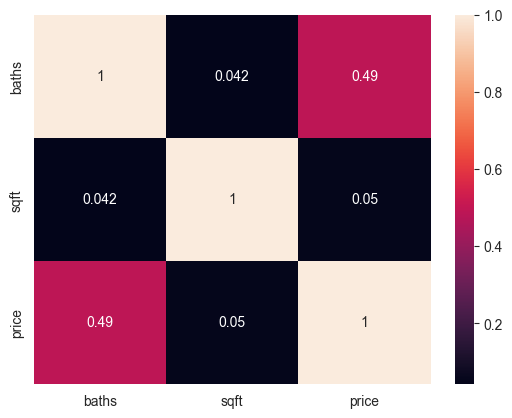

In [35]:
sns.heatmap(data_final.corr(), annot=True)
plt.show()

Number of bedrooms seem to be highly correlated to number of baths which makes sense as there is is unlikely to have 5 bedrooms with only 1 bath, hence people desire an equal number in their homes. 

I will combine the bedrooms and bathrooms columns into 1 using PCA later on to avoid the problem of multicollinearity.

Bedrooms and baths also seem to be the most correlated to price of the porperty.

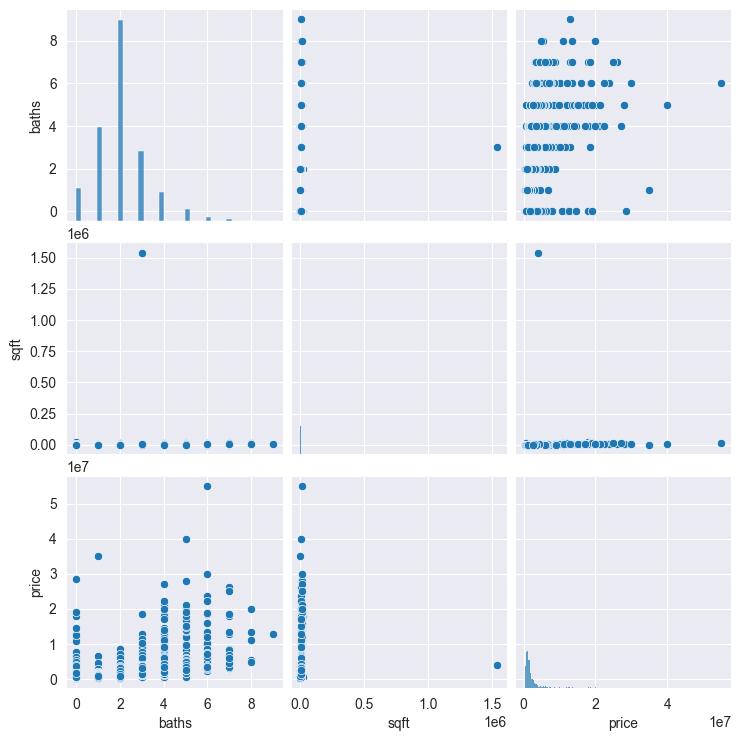

In [36]:
sns.pairplot(data_final)

### Boxplot
A box plot, also known as a box-and-whisker plot or a box plot diagram, is a graphical representation of the distribution of a continuous variable. It is a way to visualize the underlying distribution of the data and identify any patterns or trends.
--> Identify any outliers or anomalies in the data

A box plot consists of a box, which represents the middle 50% of the data, and whiskers, which extend from the box to show the full range of the data. The box is divided into the upper and lower quartiles, which represent the 25th and 75th percentiles of the data, respectively. The horizontal line within the box represents the median of the data. Outliers, which are data points that are significantly different from the rest of the data, are also plotted on the graph as individual points.

#### Price vs property type

<AxesSubplot: xlabel='property_type', ylabel='price'>

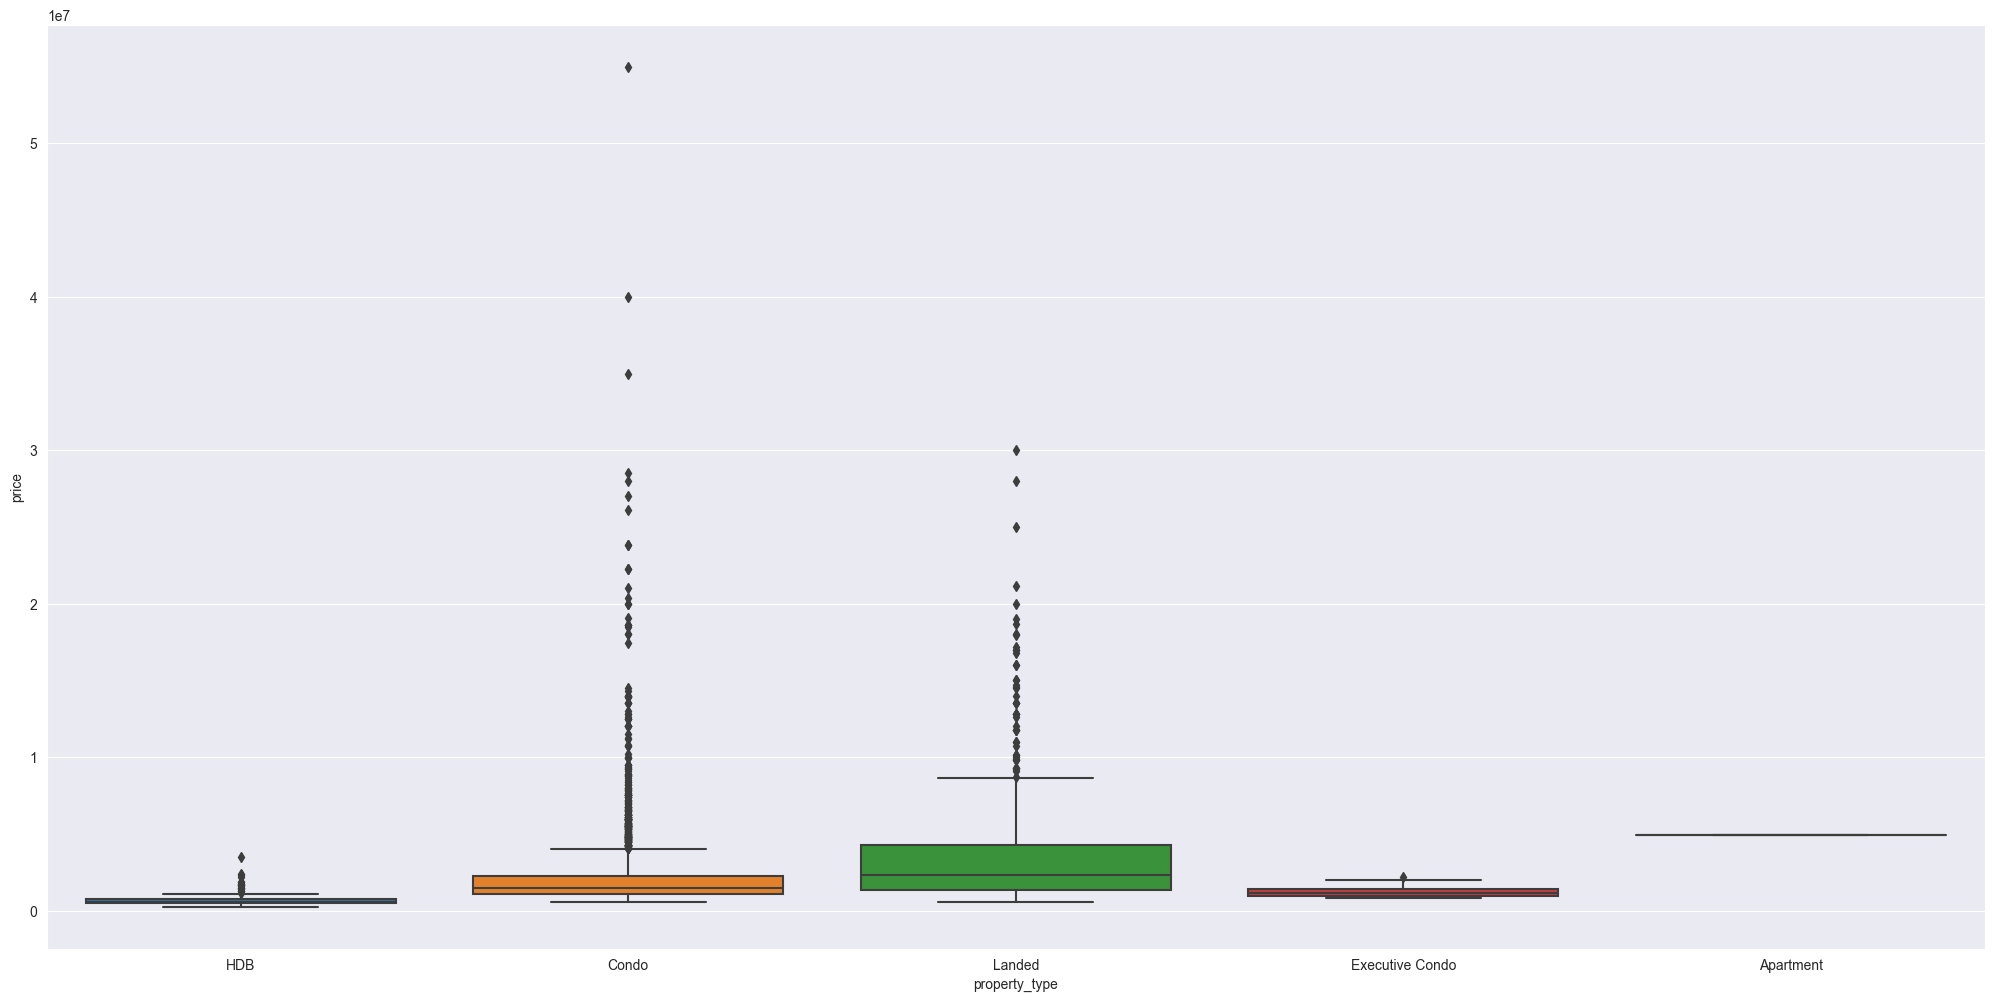

In [37]:
plt.figure(figsize=(25,12))
sns.boxplot(data=data_final,x='property_type',y='price')

#### Price vs address code

<AxesSubplot: xlabel='address_code', ylabel='price'>

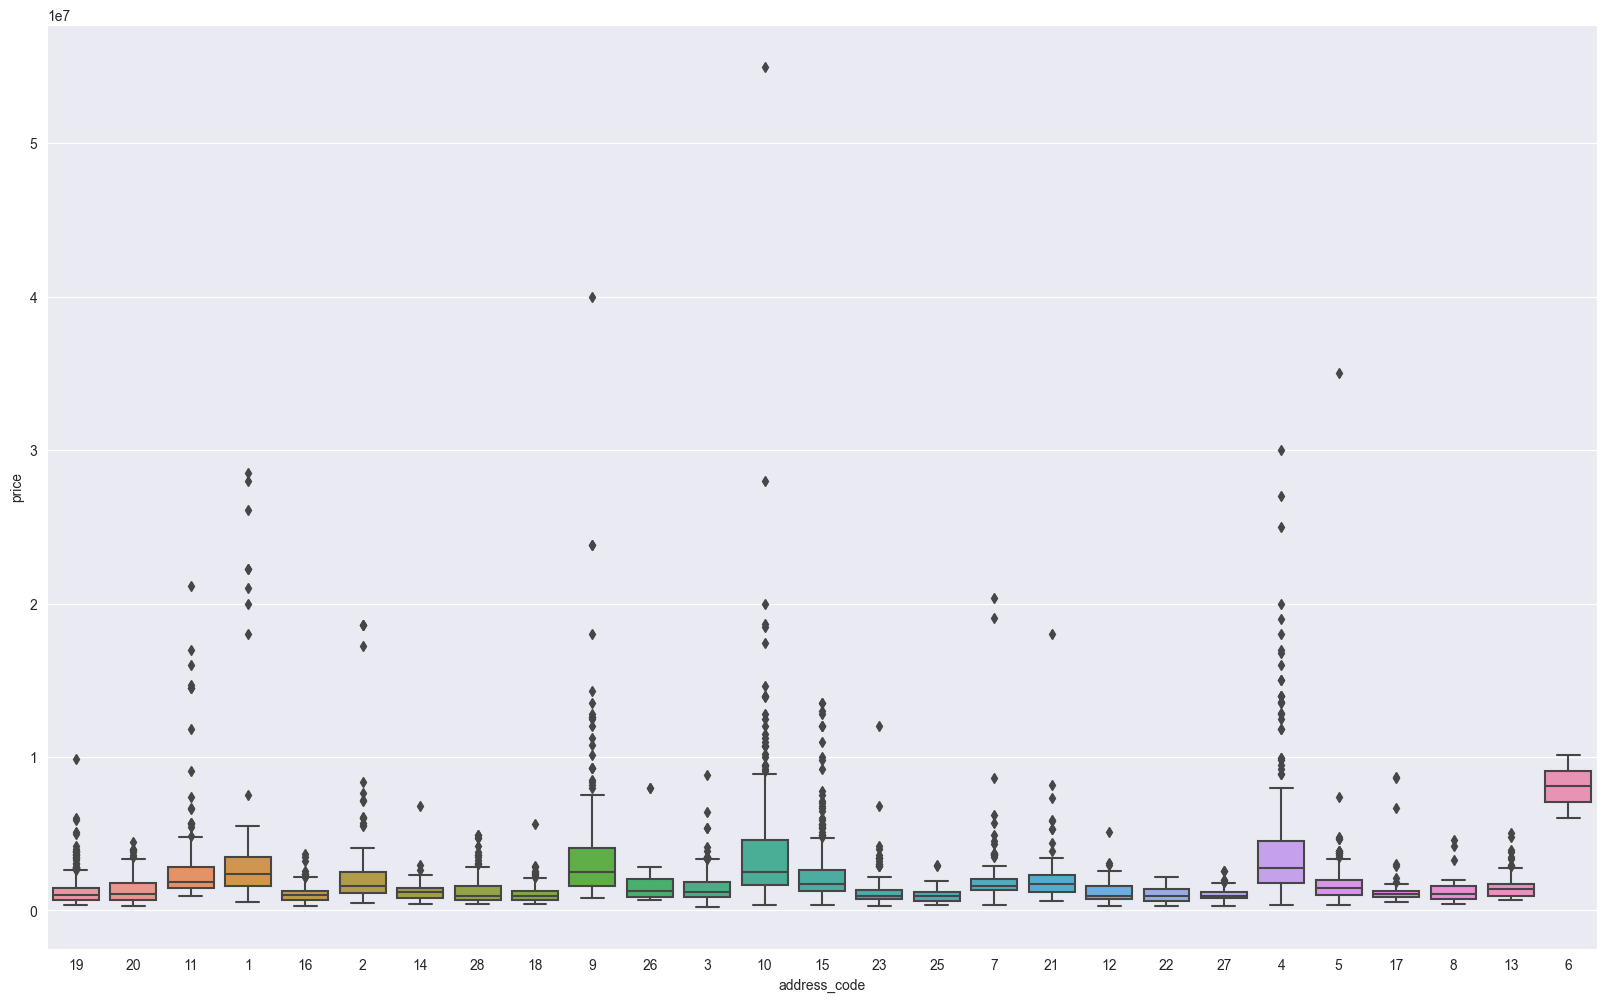

In [38]:
plt.figure(figsize=(20,12))
sns.boxplot(data=data_final,x='address_code',y='price')

### ScatterPlot

A scatterplot is a graphical representation of the relationship between two continuous variables. It is a way to visualize the association between the two variables and identify any patterns or trends in the data.

In a scatterplot, each data point is represented by a dot plotted on a two-dimensional graph. The position of the dot on the horizontal axis represents the value of one variable, and the position on the vertical axis represents the value of the other variable. The scatterplot allows you to see the distribution of the data points and how they are related to one another.

##### Price vs sqft

<AxesSubplot: xlabel='sqft', ylabel='price'>

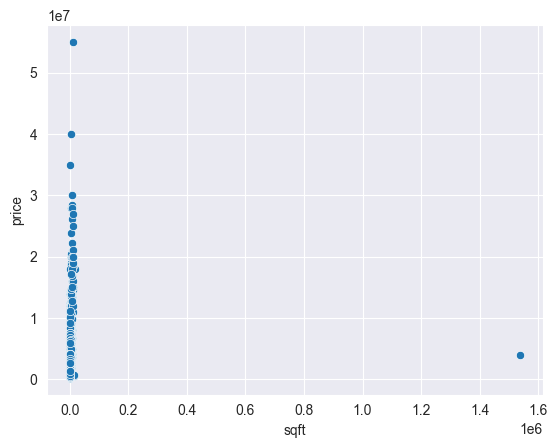

In [39]:
sns.scatterplot(data=data_final,x='sqft',y='price')

There is an anomaly for sqft

In [40]:
data_final['sqft'].sort_values().tail()

6298      13000.0
188       14940.0
5226      16684.0
761       18610.0
4214    1539000.0
Name: sqft, dtype: float64

In [41]:
data_final[data_final['sqft']==1539000]

,title,address_code,beds,baths,year_built,property_type,sqft,price
4214,4 Bed Condo for Sale in Irwell Hill Residences,9,4,3.0,2025,Condo,1539000.0,4029000.0


Removing the anomalies

In [42]:
data_final.drop(index=4214,inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_17148\1676388217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(index=4214,inplace=True)


<AxesSubplot: xlabel='sqft', ylabel='price'>

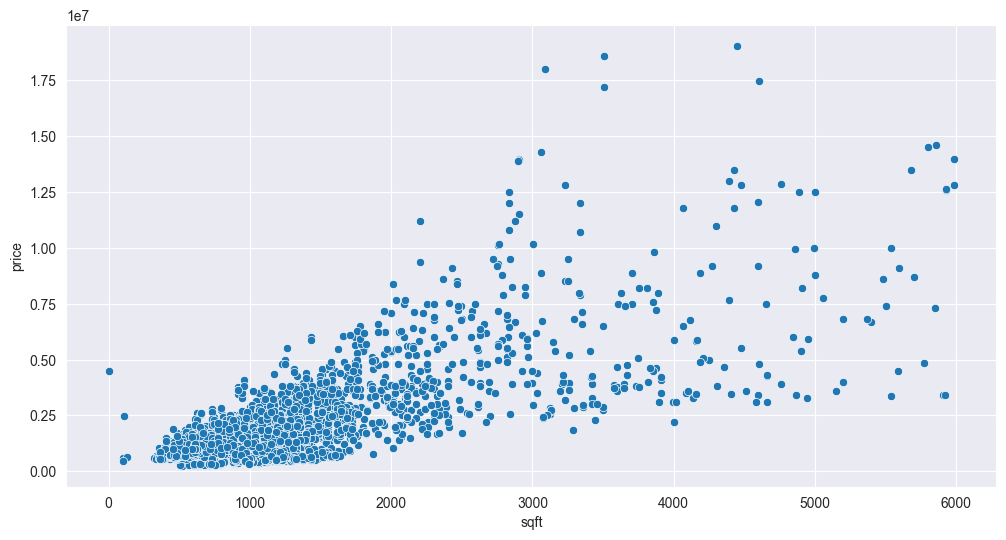

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_final[(data_final['sqft']<6000) & (data_final['price']<2e7)],x='sqft',y='price')

### KDEplots
KDEplot (Kernel Density Estimation plot) is a graphical representation of the distribution of a continuous variable. It is a way to visualize the underlying probability density function of a variable.

Used in data analysis to understand the distribution of a variable and identify patterns or trends. They are particularly useful for understanding the shape of a distribution, such as whether it is skewed or symmetrical, and for identifying any outliers or anomalies in the data.


<AxesSubplot: xlabel='sqft', ylabel='price'>

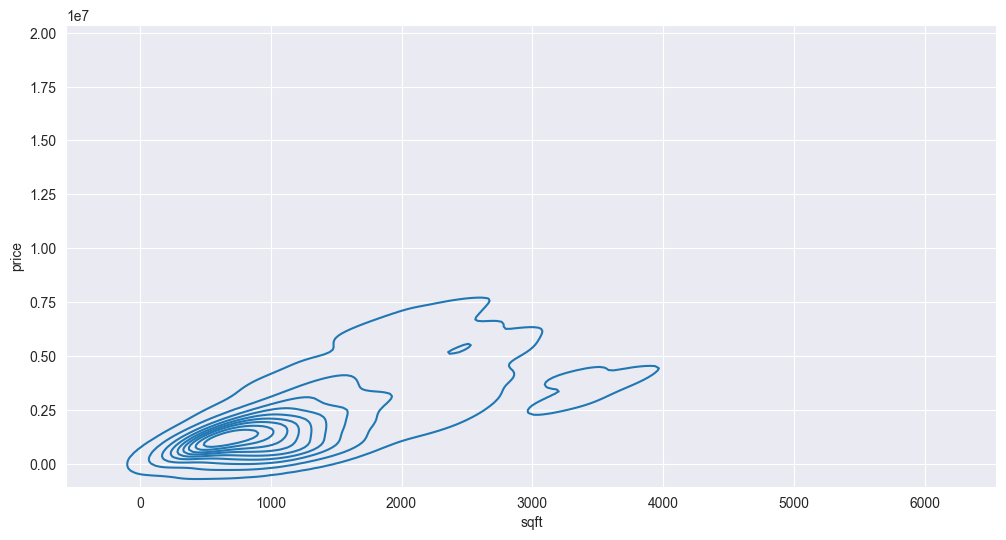

In [44]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data_final[(data_final['sqft']<6000) & (data_final['price']<2e7)],x='sqft',y='price')

the figure above proves that the distrubution of 'sqft' in function with 'price' is dense between 0 and 2000 therefore predicting low prices is would commun

##### Price vs bedrooms

<AxesSubplot: xlabel='beds', ylabel='price'>

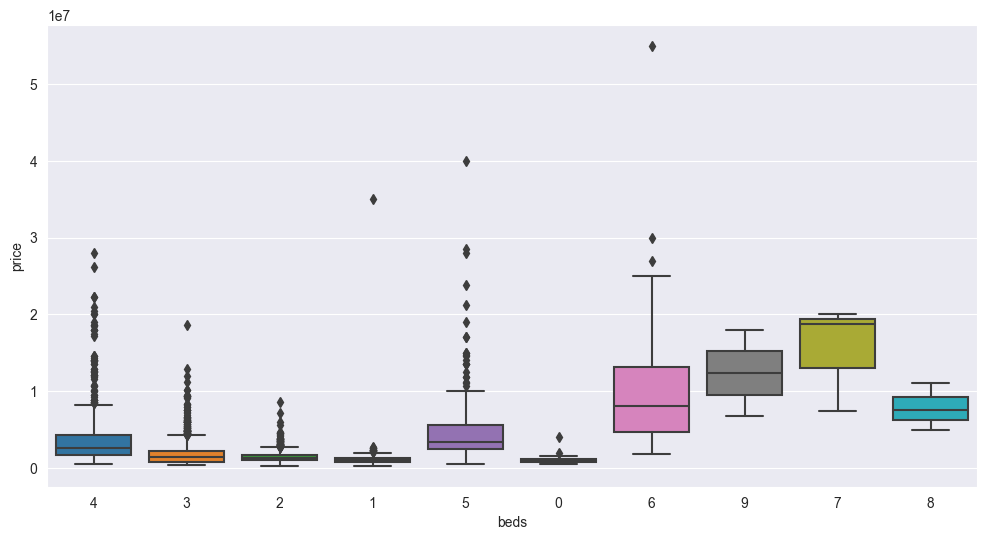

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_final,x='beds',y='price')

#### Price vs bathrooms

<AxesSubplot: xlabel='baths', ylabel='price'>

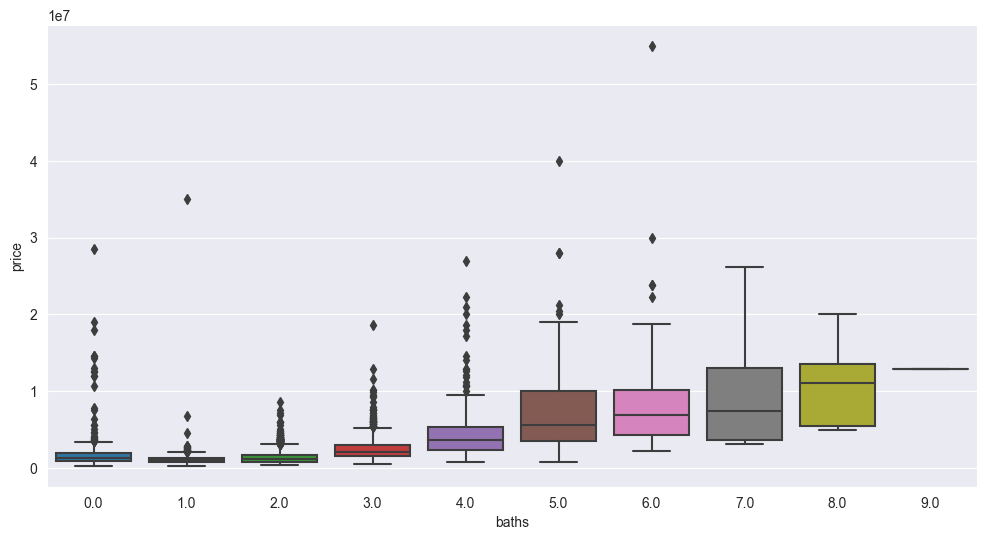

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_final,x='baths',y='price')

In [47]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 2 to 7979
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4775 non-null   object 
 1   address_code   4775 non-null   object 
 2   beds           4775 non-null   object 
 3   baths          4775 non-null   float64
 4   year_built     4775 non-null   object 
 5   property_type  4775 non-null   object 
 6   sqft           4775 non-null   float64
 7   price          4775 non-null   float64
dtypes: float64(3), object(5)
memory usage: 335.7+ KB


##### We shall analyze properties that have a listing price of lower than 10 million to increase the accuracy of our model.
 ##### --> Perhaps search and adding new data to create a separate model for properties more than 10 million.

In [48]:
data_final=data_final[data_final['price']<10000000]

Now we one-hot encode the address code and property type & possibly tenure

In [49]:
categorical = ['address_code','property_type']
cat_feats = pd.get_dummies(data_final[categorical],columns=categorical,drop_first=True)

In [50]:
data_final=data_final.join(cat_feats,how='right')

In [51]:
data_final.drop(categorical,axis=1,inplace=True)

In [52]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 2 to 7979
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          4684 non-null   object 
 1   beds                           4684 non-null   object 
 2   baths                          4684 non-null   float64
 3   year_built                     4684 non-null   object 
 4   sqft                           4684 non-null   float64
 5   price                          4684 non-null   float64
 6   address_code_10                4684 non-null   uint8  
 7   address_code_11                4684 non-null   uint8  
 8   address_code_12                4684 non-null   uint8  
 9   address_code_13                4684 non-null   uint8  
 10  address_code_14                4684 non-null   uint8  
 11  address_code_15                4684 non-null   uint8  
 12  address_code_16                4684 non-null   u

###### There is problem accured when scalling the data “ValueError: could not convert string to float: ‘Grange 1866 Pte. Ltd.’” so in Column ‘year_built’ and "Tg (2010) Pte Ltd", there are strings so should eliminate rows with this problem in X_train and y_train

In [53]:
data_final['year_built'].value_counts()

2023                 433
2016                 431
2022                 326
2017                 284
2015                 270
                    ... 
1967                   3
Tg (2010) Pte Ltd      2
1969                   2
1480                   1
1294                   1
Name: year_built, Length: 64, dtype: int64

In [54]:
mask = (data_final['year_built'] == 'Grange 1866 Pte. Ltd.') | (data_final['year_built'] == 'Tg (2010) Pte Ltd')
data_final = data_final.loc[~mask]

### Train Test Split

In [55]:
X = data_final.drop(['price','title'],axis=1)
y = data_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

In [56]:
X_train.head()

,beds,baths,year_built,sqft,address_code_10,address_code_11,address_code_12,address_code_13,address_code_14,address_code_15,...,address_code_4,address_code_5,address_code_6,address_code_7,address_code_8,address_code_9,property_type_Condo,property_type_Executive Condo,property_type_HDB,property_type_Landed
3297,3,3.0,2016,3003.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7973,4,4.0,1970,2508.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5155,3,3.0,2003,1238.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5340,3,3.0,2015,1863.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2839,2,2.0,2017,1206.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
y_train

3297    2980000.0
7973    4200000.0
5155    1780000.0
5340    3808000.0
2839    2600000.0
          ...    
5693     994000.0
5582     485000.0
5236     788000.0
136     1790000.0
4405     618000.0
Name: price, Length: 3740, dtype: float64

There is problem accured when scalling the data "ValueError: could not convert string to float: 'Grange 1866 Pte. Ltd.'" & 'Tg (2010) Pte Ltd' so in Column 'year_built', there are strings so should eliminate rows with this problem in X_train and y_train

### Scaling data

##### Improve the accuracy of certain models. Some machine learning algorithms, such as k-nearest neighbors and support vector machines, are sensitive to the scale of the input features. Scaling the data can help these models make more accurate predictions.

In [58]:
scaler = MinMaxScaler()
scaled_train=scaler.fit_transform(X_train) # error in this line : ValueError: could not convert string to float: 'Grange 1866 Pte. Ltd.'
scaled_test=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(scaled_train,columns=X.columns)
X_test_scaled=pd.DataFrame(scaled_test,columns=X.columns)

In [59]:
X_train_scaled

,beds,baths,year_built,sqft,address_code_10,address_code_11,address_code_12,address_code_13,address_code_14,address_code_15,...,address_code_4,address_code_5,address_code_6,address_code_7,address_code_8,address_code_9,property_type_Condo,property_type_Executive Condo,property_type_HDB,property_type_Landed
0,0.333333,0.375,0.986339,0.179993,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.444444,0.500,0.923497,0.150324,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.375,0.968579,0.074203,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.333333,0.375,0.984973,0.111664,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.222222,0.250,0.987705,0.072285,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.111111,0.125,0.994536,0.027751,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3736,0.333333,0.250,0.982240,0.059998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3737,0.333333,0.250,0.984973,0.067070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3738,0.222222,0.125,0.984973,0.059998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### PCA for bedrooms and bathrooms (Principal Component Analysis)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
rooms = pca.fit_transform(X_train_scaled[['beds','baths']])
# pca.explained_variance_ratio_

In [61]:
X_train_scaled['rooms']=rooms
X_train_scaled.drop(['beds','baths'],axis=1,inplace=True)

In [62]:
rooms_test = pca.transform(X_test_scaled[['beds','baths']])
X_test_scaled['rooms']=rooms_test
X_test_scaled.drop(['beds','baths'],axis=1,inplace=True)

Note that the amount of data we have is very little to create an accurate model, but we will try to make use of what we have.

In [74]:
X_train_scaled

,year_built,sqft,address_code_10,address_code_11,address_code_12,address_code_13,address_code_14,address_code_15,address_code_16,address_code_17,...,address_code_5,address_code_6,address_code_7,address_code_8,address_code_9,property_type_Condo,property_type_Executive Condo,property_type_HDB,property_type_Landed,rooms
0,0.986339,0.179993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.123066
1,0.923497,0.150324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.290013
2,0.968579,0.074203,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.123066
3,0.984973,0.111664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.123066
4,0.987705,0.072285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.043880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.994536,0.027751,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.210827
3736,0.982240,0.059998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024855
3737,0.984973,0.067070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024855
3738,0.984973,0.059998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.142092


## Model building & testing

#### We have to train the model to determine the continuous values, so we will be using these regression models :

* SVM-Support Vector Machine
* Random Forest Regressor
* Linear Regressor


In [123]:
model_SVR = svm.SVR()
model_SVR.fit(X_train_scaled,y_train)
y_predSVR = model_SVR.predict(X_train_scaled)


model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train_scaled, y_train)
y_predRFR = model_RFR.predict(X_train_scaled)


model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)
y_predLR = model_LR.predict(X_train_scaled)


In [ ]:
# model_XGB = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)
# model_XGB.fit(X_train_scaled, y_train)
# y_predXGB = model_LR.predict(X_train_scaled)
#
#
# model_LGBMR = LGBMRegressor(objective='regression',
#                                        num_leaves=4,
#                                        learning_rate=0.01,
#                                        n_estimators=5000,
#                                        max_bin=200,
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5,
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        )
# model_LGBMR.fit(X_train_scaled, y_train)
# y_predLGBMR = model_LGBMR.predict(X_train_scaled)

## Model Evaluation

###### To calculate these evaluation metrics for a linear regression model in Python, like : mean_absolute_error/ root_mean_squared_error/ r2_score
###### we decided to use mean_absolute_error

In [124]:
models = [model_SVR, model_RFR, model_LR]
def evaluate_model(model):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    return mae
maes = []
for model in models:
    mae = evaluate_model(model)
    maes.append(mae)
print(maes)

[809371.295051534, 229368.80485644212, 734906025841251.8]


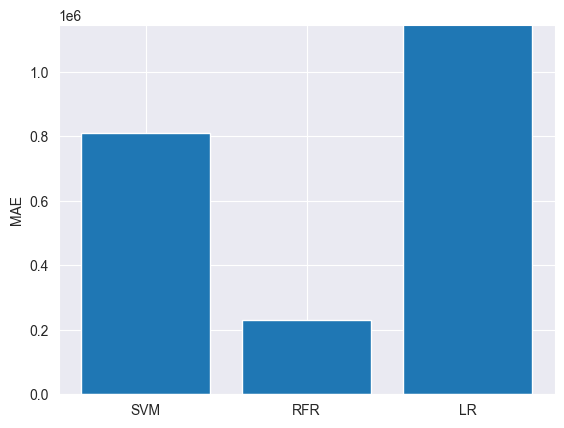

In [134]:
plt.bar(range(len(maes)), maes)
plt.xticks(range(len(maes)),['SVM', 'RFR', 'LR'])
plt.ylabel('MAE')
plt.ylim(0, max(maes)/(maes[2]/(maes[1]*5)))
plt.show()

In [136]:
print(f'The mean absolute error of the model SVM-Support Vector Machine is { "%.2f" % maes[0]}')
print(f'The mean absolute error of the model Random Forest Regressor is { "%.2f" %maes[1] }')
print(f'The mean absolute error of the model Linear Regression is { "%.2f" % maes[2]}')

The mean absolute error of the model SVM-Support Vector Machine is 809371.30
The mean absolute error of the model Random Forest Regressor is 229368.80
The mean absolute error of the model Linear Regression is 734906025841251.75


#### Important Note :
Since we're analysing properties that have a listing price of lower than 10 million (<10000000) --> The MAE is in the $100,000 range, which is regarded acceptable (house Prices values in the dataset range from $100,000 to $10,000,000).

### Testing on new data

###### Single prediction on a new listing on 3 June 2021 from :
###### https://www.99.co/singapore/sale/property/tre-residences-condo-KdSQKyUukqS6PAAeSU2JDT?enquiry_position=2&enquiry_source=Search.
###### input Data: 4 Beds - 3 Baths Built - 2018 year_built - 947 sqft - D14 - Condo // D14 : 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 // Condo : 1,0,0,0
###### The price listed is $1,580,000!


In [66]:
# test0_scaled = [0.986339,0.061256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]
# # test = [4,3,2018,947,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
# # test1 = scaler.transform([test])
# pca = PCA(n_components=1)
# room = pca.fit_transform([[0.986339,0.061256]])[0][0]
# room

In [78]:
test_scaled = [0.986339,0.061256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.043880]
# print(len(test_scaled))

For the model to predict we have to input the data in the same format and order

In [87]:
prediction1 = model_SVR.predict([test_scaled])[0]
print(f'The actual price listed is 1,580,000 and the predicted price is { "%.2f" % prediction1}')

The actual price listed is 1,580,000 and the predicted price is 1341444.07


C:\Users\MSI\Desktop\house_recommender\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
